   DrivAge  ClaimNb     Exposure  BonusMalus
0       18       65   210.689377   93.009358
1       19      243   912.874303   96.128763
2       20      335  1460.979158   95.273395
3       21      353  1819.911138   93.409060
4       22      430  2223.703357   91.191457
   DrivAge  ClaimNb     Exposure  BonusMalus  Frequency
0       18       65   210.689377   93.009358   0.308511
1       19      243   912.874303   96.128763   0.266192
2       20      335  1460.979158   95.273395   0.229298
3       21      353  1819.911138   93.409060   0.193966
4       22      430  2223.703357   91.191457   0.193371
              IDpol        ClaimNb       Exposure       VehPower  \
count  6.780130e+05  678013.000000  678013.000000  678013.000000   
mean   2.621857e+06       0.053247       0.528545       6.454631   
std    1.641783e+06       0.240117       0.364081       2.050906   
min    1.000000e+00       0.000000       0.002732       4.000000   
25%    1.157951e+06       0.000000       0.180000     

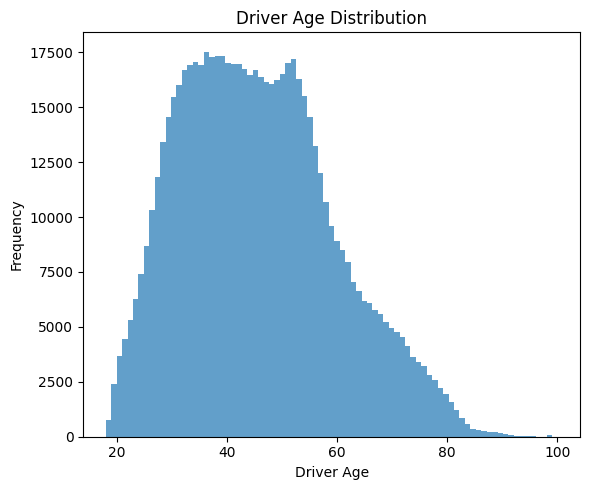

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

mtlp_data = pd.read_csv("freMTPL2freq.csv")
mtlp_data["Exposure"] = mtlp_data["Exposure"].clip(upper=1.0)

mtlp_age_count = mtlp_data["DrivAge"].nunique()

age_stats = mtlp_data.groupby("DrivAge").agg({
    "ClaimNb": "sum",
    "Exposure": "sum",
    "BonusMalus": "mean"
}).reset_index()

print(age_stats.head())

age_stats["Frequency"] = age_stats["ClaimNb"] / age_stats["Exposure"]

print(age_stats.head())


# Display basic statistics of the dataset
print(mtlp_data.describe())

fig, ax = plt.subplots(figsize=(6, 5))

plot_data = age_stats[(age_stats["DrivAge"] >= 18) & (age_stats["DrivAge"] <= 90)]

ax.hist(mtlp_data["DrivAge"], bins=mtlp_age_count, alpha=0.7)
ax.set_title("Driver Age Distribution")
ax.set_xlabel("Driver Age")
ax.set_ylabel("Frequency")


plt.tight_layout()
plt.show()

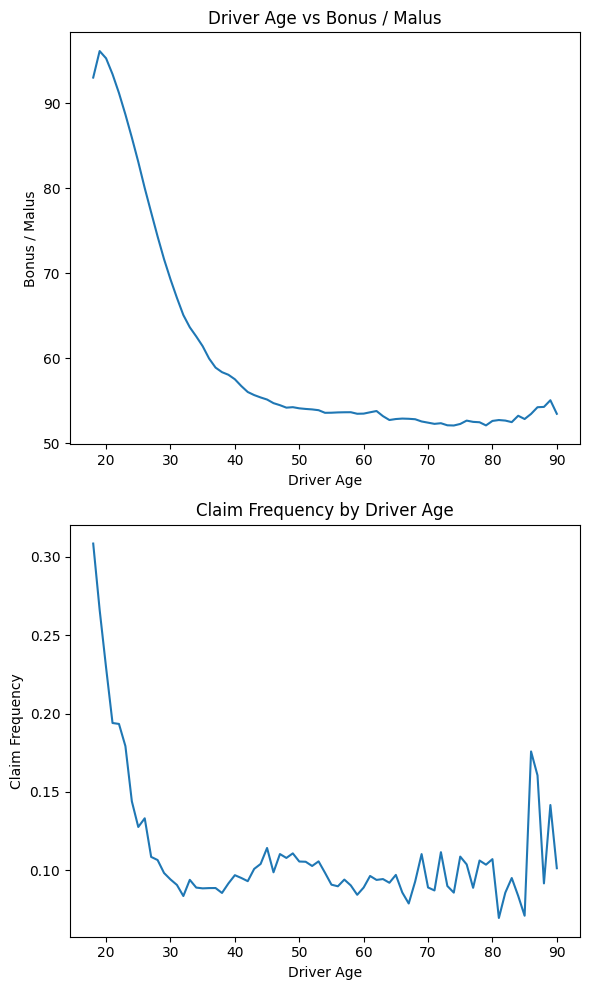

In [11]:

fig, ax = plt.subplots(2, 1, figsize=(6, 10))

sns.lineplot(data=plot_data, x="DrivAge", y="BonusMalus", ax=ax[0])
ax[0].set_title("Driver Age vs Bonus / Malus")
ax[0].set_xlabel("Driver Age")
ax[0].set_ylabel("Bonus / Malus")

sns.lineplot(data=plot_data, x="DrivAge", y="Frequency", ax=ax[1])
ax[1].set_title("Claim Frequency by Driver Age")
ax[1].set_xlabel("Driver Age")
ax[1].set_ylabel("Claim Frequency")

plt.tight_layout()
plt.show()

    VehPower  ClaimNb      Exposure  VehiclePowerCount  Frequency
0          4     5699  60055.327304             115349   0.094896
1          5     7278  68148.128821             124821   0.106797
2          6     8381  82497.590172             148976   0.101591
3          7     7627  77919.746700             145401   0.097883
4          8     1922  22673.966305              46956   0.084767
5          9     1754  15338.643656              30085   0.114352
6         10     1789  15367.090824              31354   0.116418
7         11      897   8491.308452              18352   0.105637
8         12      359   3790.798343               8214   0.094703
9         13      153   1637.035322               3229   0.093462
10        14      119   1180.020391               2350   0.100846
11        15      124   1260.449173               2926   0.098378


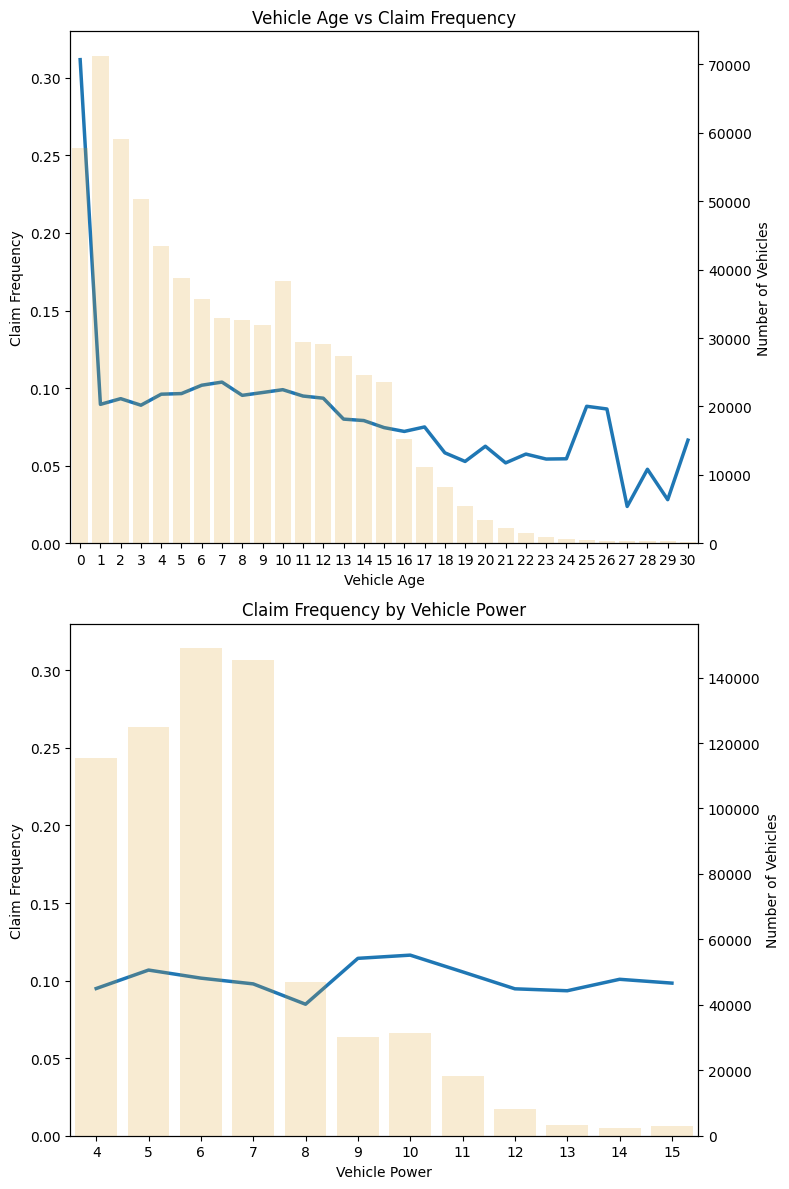

In [55]:
#print(mtlp_data.describe())

vehicle_age_stats = mtlp_data.groupby("VehAge").agg(
    ClaimNb=("ClaimNb", "sum"),
    Exposure=("Exposure", "sum"),
    VehicleCount=("VehAge", "size")
).reset_index()

vehicle_age_stats["Frequency"] = vehicle_age_stats["ClaimNb"] / vehicle_age_stats["Exposure"]

#print(vehicle_age_stats)

vehicle_plot_data = vehicle_age_stats[(vehicle_age_stats["VehAge"] >= 0) & (vehicle_age_stats["VehAge"] <= 30)]

vehicle_power_stats = mtlp_data.groupby("VehPower").agg(
    ClaimNb=("ClaimNb", "sum"),
    Exposure=("Exposure", "sum"),
    VehiclePowerCount=("VehPower", "size")
).reset_index()

vehicle_power_stats["Frequency"] = vehicle_power_stats["ClaimNb"] / vehicle_power_stats["Exposure"]

print(vehicle_power_stats)



fig, ax = plt.subplots(2, 1, figsize=(8, 12))

sns.lineplot(data=vehicle_plot_data, x="VehAge", y="Frequency", ax=ax[0], linewidth=2.5)
ax[0].set_title("Vehicle Age vs Claim Frequency")
ax[0].set_xlabel("Vehicle Age")
ax[0].set_ylabel("Claim Frequency")
ax[0].set_ylim(0, 0.33)

ax2 = ax[0].twinx()

sns.barplot(data=vehicle_plot_data, x="VehAge", y="VehicleCount", ax=ax2, color='orange', alpha=0.2)
ax2.set_ylabel("Number of Vehicles")




sns.lineplot(data=vehicle_power_stats, x=vehicle_power_stats["VehPower"].index, y="Frequency", ax=ax[1], linewidth=2.5)
ax[1].set_title("Claim Frequency by Vehicle Power")
ax[1].set_xlabel("Vehicle Power")
ax[1].set_ylabel("Claim Frequency")
ax[1].set_ylim(0, 0.33)

ax3 = ax[1].twinx()

sns.barplot(data=vehicle_power_stats, x="VehPower", y="VehiclePowerCount", ax=ax3, color='orange', alpha=0.2)
ax3.set_ylabel("Number of Vehicles")

plt.tight_layout()
plt.show()

In [63]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

#print(mtlp_data.head())

mtlp_data["Exposure"] = mtlp_data["Exposure"].clip(upper=1.0)
mtlp_data["ClaimNb"] = mtlp_data["ClaimNb"].clip(upper=4)

mtlp_data["LogExposure"] = np.log(mtlp_data["Exposure"])

mtlp_data["VehPower"] = mtlp_data["VehPower"].astype(str)

formula = "ClaimNb  ~ DrivAge + VehPower"

model = smf.glm(formula=formula,
                data=mtlp_data,
                offset=mtlp_data["LogExposure"],
                family=sm.families.Poisson(link=sm.families.links.log()))

result = model.fit()
print(result.summary())

#print(mtlp_data.head())

c:\Users\paula\PythonCoding\python_practice_steps\.venv\Lib\site-packages\statsmodels\genmod\families\links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(


                 Generalized Linear Model Regression Results                  
Dep. Variable:                ClaimNb   No. Observations:               678013
Model:                            GLM   Df Residuals:                   678000
Model Family:                 Poisson   Df Model:                           12
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.4645e+05
Date:                Sun, 28 Dec 2025   Deviance:                   2.2359e+05
Time:                        08:53:19   Pearson chi2:                 1.91e+06
No. Iterations:                     7   Pseudo R-squ. (CS):          0.0005013
Covariance Type:            nonrobust                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -1.9335      0.029    -65.